# Echelon Form and Row Reduced Echelon Form of a Rectangular System with applications: Block Matrix Operation, Matrix Inversion, Spanning sets of all the four fundamental subspaces, Image compression

---
This notebook introduces how to computation of the Row Reduced Echelon Form using the Symbolic Package (Sympy). Then, the implementations of Echelon Form, Echelon Form with Partial Pivoting, Row Reduced Echelon Form and Row Reduced Echelon Form with Partial Pivoting are provided, with related example. Lastly, several application of these implemented methods are provided, such as:
* Comparing of the spanning sets of all the four fundamental subspaces using the  Row Reduced Echelon Form obtained by sympy method, with respect the implemented one
* Block Matrix and Matrix Inverse
* Image compression

## Import libraries

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Uni-Master-Degree/First-Year/Numerical-Methods-for-Computer-Science/Notebook/Numerical-Methods-Exercises/2-Echelon-Form-Row-Reduced-Echelon-Form-with-Applications/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Uni-Master-Degree/First-Year/Numerical-Methods-for-Computer-Science/Notebook/Numerical-Methods-Exercises/2-Echelon-Form-Row-Reduced-Echelon-Form-with-Applications


##  Computing the Row Reduced Echelon Form using the method *rref* from **symbolic package** (***sympy***)

### Test on a matrix **A** with 3 rows and 7 columns

In [3]:
# Definition of the matrix A
A = sym.Matrix([[1, 2, 2, 3, 1, 0, 0],
                [2, 4, 1, 3, 0,1,0],
                [3, 6, 1, 4,0,0,1]])
print("Matrix A: {} ".format(A))

# Use sympy.rref() method to compute the row reduce echelon form.
# The method rref return a matrix in the row reduce echelon form and
# a vector with the index of pivots (position of basic columns in the matrix).
A_rref = A.rref()

# print the row reduce  form of the matrix A and the indexes of the basic columns
print("\nThe Row Reduced Echelon Form of matrix A and the pivot columns are: {}"
      .format(A_rref))

Matrix A: Matrix([[1, 2, 2, 3, 1, 0, 0], [2, 4, 1, 3, 0, 1, 0], [3, 6, 1, 4, 0, 0, 1]]) 

The Row Reduced Echelon Form of matrix A and the pivot columns are: (Matrix([
[1, 2, 0, 1, 0, -1,  1],
[0, 0, 1, 1, 0,  3, -2],
[0, 0, 0, 0, 1, -5,  3]]), (0, 2, 4))


### Test on a matrix **B** with 4 rows and 6 columns

In [4]:
# Definition of the matrix B
B = sym.Matrix([[1, 1, 2, 2, 1, 1], [2, 2, 4, 4, 3, 1],
                [2, 2, 4, 4, 2, 2], [3, 5, 8, 6, 5, 3]])
print("Matrix B: {} ".format(B))

B_rref = B.rref()

# Print the row reduce form of the matrix B and the indexes of the basic columns
print("\nThe Row Reduced Echelon Form of matrix B and the pivot columns are: {}"
      .format(B_rref))

Matrix B: Matrix([[1, 1, 2, 2, 1, 1], [2, 2, 4, 4, 3, 1], [2, 2, 4, 4, 2, 2], [3, 5, 8, 6, 5, 3]]) 

The Row Reduced Echelon Form of matrix B and the pivot columns are: (Matrix([
[1, 0, 1, 2, 0,  1],
[0, 1, 1, 0, 0,  1],
[0, 0, 0, 0, 1, -1],
[0, 0, 0, 0, 0,  0]]), (0, 1, 4))


## Echelon Form, Echelon Form with Partial Pivoting, Row Reduced Echelon Form and Row Reduced Echelon Form with Partial Pivoting

### Function to compute the Echelon Form
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Echelon Form of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix

In [5]:
def echelon_form(A):
  # In this implementation we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrive the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0, m):
    # Uset to check if we need to move to the next column
    ech = True

    while (ech) & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not consider the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we neew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero) we can perform the row exchange.
      #
      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.
      #
      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # very small value which is near to zero.
      if abs(U[i, j]) > 1e-15:
        # Perform permutation between row i and row indm
        # to move the greatest value in column in the pivotal position
        U[[i, indm], :] = U[[indm, i], :]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if abs(U[i, j]) > 1e-15:
        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1 : m, j] / U[i, j]

        # In numpy array there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i + 1 : m, j + 1 : n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i + 1 : m, j] = 0

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech = True
  return (U, ind_basic_cols)

#### Test on a matrix **C** with 3 rows and 4 columns

In [6]:
C = np.array([[1., 2., 2., 3.], [2, 4, 1, 3], [3, 6, 1, 4]])
print("Matrix C: \n{}".format(C))

U, ind_basic_cols = echelon_form(C)
print("\nThe Echelon form of matrix C: \n{}".format(U))
print("\nThe basic columns of matrix C: {}".format(ind_basic_cols))

Matrix C: 
[[1. 2. 2. 3.]
 [2. 4. 1. 3.]
 [3. 6. 1. 4.]]

The Echelon form of matrix C: 
[[3.00000000e+00 6.00000000e+00 1.00000000e+00 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66666667e+00 1.66666667e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]]

The basic columns of matrix C: [0, 2]


### Function to compute the Echelon Form with Partial Pivoting
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Echelon Form using Partial Pivoting of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix
  * **perm_matrix**: The permutation matrix used to compute the Partial Pivoting

In [7]:
def echelon_form_with_partial_pivot(A):
  # In this implementation we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrive the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Create an identity matrix of size mxm
  # to use as permutation matrix
  perm_matrix = np.eye(m)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0, m):
    # Used to check if we need to move to the next column
    ech = True

    while (ech) & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not consider the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we neew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero) we can perform the row exchange.

      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.

      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # very small value which is near to zero.
      if (indm != i) & (abs(U[indm, j]) > 1e-15):
        # Perform permutation between row i and row indm
        # to move the greatest value in column in the pivotal position
        U[[i, indm], :] = U[[indm, i], :]

        # Update the permutation matrix to save all the
        # permutation that we will perform
        perm_matrix[[i, indm], :] = perm_matrix[[indm, i], :]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if abs(U[i, j]) > 1e-15:
        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1 : m, j] / U[i, j]

        # In numpy array there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i + 1 : m, j + 1 : n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i + 1 : m, j] = 0

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech = True
  return (U, ind_basic_cols, perm_matrix)

#### Test on a matrix **C** with 3 rows and 4 columns
**NB:** The Echelon Form and The Row Reduced Echelon Form (also implementing the Partial Pivoting) are not a good methods to compute the rank of a matrix.
In fact, when we compute by hands the rank of a matrix we could obtain a number (n), but when we compute numerically we could obtain something different. In the example below, we know that by hands in position (3,4) there is 0, so the rank = 2, but on a machine we obtain 1e-16, which is different from 0. So,theoretically the rank is 3 but numerically 1e-16 could be considered zero, which means that the rank numerically is 2.
**Because of this problem, the computation of the matrix rank is a very difficult problem; thus, we will use more advanced algorithms.**

In [8]:
C = np.array([[1., 2., 2., 3.], [2., 4., 1., 3.], [3., 6., 1., 4.]])
print("Matrix C: \n{}".format(C))

U, ind_basic_cols, perm_matrix = echelon_form_with_partial_pivot(C)
print("\nThe Echelon Form with Partial Pivoting of matrix C: \n{}".format(U))
print("\nThe basic columns of matrix C: {}".format(ind_basic_cols))
print("\nThe Permutation matrix used to perform the Partial Pivoting on C:\n{}\n".format(perm_matrix))
print("Computing by hands the Echelon Form with Partial Pivoting of C, we will find that rank(C) = 2.\n" +
      "Looking at U, from a theoretically point of view, we should consider that rank(C) = 3 because 1.11022302e-16 =/= 0.\n" +
      "From a numerically point of view 1.11022302e-16 is something very small (roundoff error).\n" +
      "So, we can consider zero, which means that rank(C) = 2.")

Matrix C: 
[[1. 2. 2. 3.]
 [2. 4. 1. 3.]
 [3. 6. 1. 4.]]

The Echelon Form with Partial Pivoting of matrix C: 
[[3.00000000e+00 6.00000000e+00 1.00000000e+00 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66666667e+00 1.66666667e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]]

The basic columns of matrix C: [0, 2]

The Permutation matrix used to perform the Partial Pivoting on C:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Computing by hands the Echelon Form with Partial Pivoting of C, we will find that rank(C) = 2.
Looking at U, from a theoretically point of view, we should consider that rank(C) = 3 because 1.11022302e-16 =/= 0.
From a numerically point of view 1.11022302e-16 is something very small (roundoff error).
So, we can consider zero, which means that rank(C) = 2.


### Function to compute the Row Reduced Echelon Form
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Row Reduced Echelon Form of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix A

In [9]:
def row_reduced_echelon_form(A):
  # In this implementation we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrive the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0,m):
    # Used to check if we need to move to the next column
    ech = True

    while (ech) & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not consider the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we neew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero) we can perform the row exchange.
      #
      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.
      #
      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # very small value which is near to zero.
      if  (abs(U[indm, j]) > 1e-15):
        # Perform permutation between row i and row idm
        U[ [i, indm], :] = U[[indm, i], :]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if ( abs(U[i,j]) > 1e-15):
        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1: m, j] / U[i, j]

        # In numpy array there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i + 1 : m, j + 1 : n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i+1:m,j]=0

        # Divided all the row by the pivotal element in order to put the pivotal
        # element equals to 1
        U[i, j : n] = U[i, j : n] / U[i, j]

        if i > 0:
          # If we are working on a row different from the first row, we need to
          # perform linear combination in order to put zero also above the pivot.
          # So, we compute the coefficent M needed to comput the row elimination.
          M = U[0: i, j]/U[i, j]
          U[0 : i, j : n] = U[0: i, j: n] - np.outer(M, U[i, j : n])

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech= True
  return(U, ind_basic_cols)

#### Test on a matrix **D** with 3 rows and 7 columns

In [10]:
D = np.array([[1., 2., 2., 3., 1., 0., 0.], [2., 4., 1., 3., 0., 1., 0.], [3., 6., 1., 4., 0., 0., 1.]])
print("Matrix D: \n{}".format(D))

U, ind_basic_cols = row_reduced_echelon_form(D)
print("\nThe Row Reduced Echelon form of matrix D: \n{}".format(U))
print("\nThe basic columns of matrix D: \n{}".format(ind_basic_cols))

Matrix D: 
[[1. 2. 2. 3. 1. 0. 0.]
 [2. 4. 1. 3. 0. 1. 0.]
 [3. 6. 1. 4. 0. 0. 1.]]

The Row Reduced Echelon form of matrix D: 
[[ 1.00000000e+00  2.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  3.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
   1.00000000e+00 -5.00000000e+00  3.00000000e+00]]

The basic columns of matrix D: 
[0, 2, 4]


### Function to compute the Row Reduced Echelon Form with Partial Pivoting
* INPUT
  * **A**: Input matrix A
* OUTPUT
  * **U**: The Row Reduced Echelon Form using Partial Pivoting of the input matrix A
  * **ind_basic_cols**: The position of basic columns into the input matrix A
  * **perm_matrix**: The permutation matrix used to compute the Partial Pivoting

In [11]:
def row_reduced_echelon_form_with_partial_pivot(A):
  # In this implementation we are supposing that
  # the number of columns is greater or equal the number of rows

  # Retrive the dimension of the matrix A:
  # m: number of rows
  # n: number of columns
  (m, n) = A.shape

  # Copy the matrix A in U, which will stored the echelon matrix
  U = np.copy(A)

  # Create an identity matrix of size mxm
  # to use as permutation matrix
  perm_matrix = np.eye(m)

  # Vector to store the positions of pivotal elements (basic columns)
  ind_basic_cols = []

  # j: index related to the columns; j take into account
  # when we move from a pivot columns to a non-pivot columns
  j = 0

  # i: index related to the rows
  for i in range(0,m):
    # Used to check if we need to move to the next column
    ech = True

    while (ech) & (j < n):
      # Find the pivotal index, maximum element in the column j, below the
      # main diagonal. In fact, we search the maximum element in absolute
      # value between the values in column j, but in row from i to m.
      # Basically, we are not consider the values in the pivotal position.
      indm = np.argmax(abs(U[i:m, j]))

      # Then we store the index of the maximum value in columns
      # (we add i because we neew to take into account the original position
      # into the original matrix)
      indm = indm + i

      # # If the index of max pivot on column j is different from
      # the diagonal index i and the element in position idm is greater than
      # 1e-15 (which is something near to zero) we can perform the row exchange.
      #
      # 1) If abs(U[indm,j]) > 1e-15, this means that all the
      # elements on column j are > 1e-15.
      #
      # 2) We put > 1e-15 instead of != 0 because in the machine
      # is not correct check (=0 or != 0), so we check with a
      # very small value which is near to zero.
      if (indm != i) & (abs(U[indm,j]) > 1e-15):

        # Perform permutation between row i and row idm
        U[[i, indm], :] = U[[indm, i], :]

        # Update the permutation matrix to save all the
        # permutation that we will perform
        perm_matrix[ [i, indm],:] = perm_matrix[[indm,i],:]

      # If the pivotal element is different from zero,
      # we can apply the rows elimination
      if (abs(U[i,j]) > 1e-15):

        # Store the index of pivotal element (basic column)
        ind_basic_cols.append(j)

        # We compute in one time all the coefficients M used to make the
        # row elimination and we store in one vector.
        # In this way, we can compute the elimination of all the row
        # below the pivotal element in one time.
        M = U[i + 1 : m, j] / U[i, j]

        # In numpy array there is no difference row vectors or column vectors
        # np.outer to perform the outer product between two vectors.
        # We perform all the row linear combination with one statement
        # A(*,*) = A(*,*) - m A(*,*)
        U[i + 1 : m, j + 1 : n] = U[i+1:m,j+1:n] - np.outer(M, U[i, j + 1 : n])

        # We put 0 below the pivotal element
        U[i + 1 : m, j] = 0

        # Divided all the row by the pivotal element in order to put the pivotal
        # element equals to 1
        U[i, j : n] = U[i, j : n] / U[i, j]

        if i > 0:
          # If we are working on a row different from the first row, we need to
          # perform linear combination in order to put zero also above the pivot.
          # So, we compute the coefficent M needed to comput the row elimination.
          M= U[0 : i , j] / U[i, j]
          U[0 : i, j : n] = U[0 : i, j : n] - np.outer(M, U[i, j : n])

        j = j + 1
        ech = False
      else:
        # The column is not a pivot column,
        # so we can move to find the next
        j = j + 1
        ech = True

  return(U, ind_basic_cols, perm_matrix)

#### Test on a matrix **D** with 3 rows and 7 columns

In [12]:
D = np.array([[1., 2., 2., 3., 1., 0., 0.], [2., 4., 1., 3., 0., 1., 0.], [3., 6., 1., 4., 0., 0., 1.]])
print("Matrix D: \n{}".format(D))

U, ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(D)
print("\nThe Row Reduced Echelon form of matrix D: \n{}".format(U))
print("\nThe basic columns of matrix D: {}".format(ind_basic_cols))
print("\nThe Permutation matrix used to perform the Partial Pivoting on D: \n{}".format(perm_matrix))

Matrix D: 
[[1. 2. 2. 3. 1. 0. 0.]
 [2. 4. 1. 3. 0. 1. 0.]
 [3. 6. 1. 4. 0. 0. 1.]]

The Row Reduced Echelon form of matrix D: 
[[ 1.00000000e+00  2.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  3.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16
   1.00000000e+00 -5.00000000e+00  3.00000000e+00]]

The basic columns of matrix D: [0, 2, 4]

The Permutation matrix used to perform the Partial Pivoting on D: 
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


## Applications of Row Reduced Echelon Form

### Computing the spanning sets for all the four fundamental subspaces
**Exercise 4.2.1 - page 178, Carl Meyer**:
* Use the function *sp.rref* and the function *row_reduced_form_with_partial_pivot* to compute the row reduced form of the given matrix
* Find the Spanning sets for all the four fundamental subspaces, using both methods

In [13]:
E = sym.Matrix([[1, 2, 1, 1, 5],[-2, -4, 0, 4, -2],[1, 2, 2, 4, 9]])
print("Matrix E: {}".format(E))

E_rref = E.rref()
print("\n1) Using sym.rref function")
print("-------------------------------------------------------------------------")
print("The Row Reduced Echelon Form of matrix E and the pivot columns are: \n{}".format(E_rref))
print("\nThe spanning sets of all the four fundamental subspaces: TODO ")
print("=========================================================================")

U, ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(E)
print("\n2) Using row_reduced_form_with_partial_pivot function")
print("-------------------------------------------------------------------------")
print("The Row Reduced Echelon Form of matrix E and the pivot columns are: \n{} {}".format(U, ind_basic_cols))
print("\nThe spanning sets of all the four fundamental subspaces: TODO ")

Matrix E: Matrix([[1, 2, 1, 1, 5], [-2, -4, 0, 4, -2], [1, 2, 2, 4, 9]])

1) Using sym.rref function
-------------------------------------------------------------------------
The Row Reduced Echelon Form of matrix E and the pivot columns are: 
(Matrix([
[1, 2, 0, -2, 1],
[0, 0, 1,  3, 4],
[0, 0, 0,  0, 0]]), (0, 2))

The spanning sets of all the four fundamental subspaces: TODO 

2) Using row_reduced_form_with_partial_pivot function
-------------------------------------------------------------------------
The Row Reduced Echelon Form of matrix E and the pivot columns are: 
[[1 2 0 -2 1]
 [0 0 1 3 4]
 [0 0 0 0 0]] [0, 2]

The spanning sets of all the four fundamental subspaces: TODO 


### Image compression
In this application we will check how we can use the row reduced echelon form to compress an image. We won't compress an image in terms of "reduction of size without modify the original image" but we will compress it in terms of "pixel reduction".
An image is a tensor made up by the 3 RGB channel. Because of the effort related to work with tensor, we will convert the original image (tensor) in a gray scale image (matrix).
Then, we can apply on this matrix of pixels the required method to compress it.
In particular, we compute the Row Reduced Echelon Form of the matrix to identify the basic columns. At this point we can reconstruct the image using only the basic columns, which are columns that preserve the main scene, altough making a reduction of the total number of pixels.

#### Gray scale compression (vertically/horizontally) using the Row Reduced Echelon Form with Partial Pivoting
* INPUT
  * **img**: Input image in RGB color
  * **compression_mode**: if set to **1**, the function compress the image in horizontal way; default is **0** to compress the image vertically

In [14]:
def gray_scale_img_compression_rref_partial_pivot(img, compression_mode = 0):

  if compression_mode == 0 or compression_mode == 1:
    # set rgb_weights used to convert the original RGB image to a Gray scale
    rgb_weights = [0.2989, 0.5870, 0.1140]

    # Convert the RGB image into Gray scale
    gray_img = np.dot(img, rgb_weights)

    # Create a copy of the original gray scale before trasposition, if required
    gray_img_original = np.copy(gray_img)

    # If user select 1, then we will compress the image in horizontal way
    gray_img = gray_img.T if compression_mode == 1 else gray_img

    # Compute the Row Reduced Echelon Form to identify the basic columns
    U, gray_img_ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(gray_img)

    # Reconstruct the image using only the basic columns
    compress_gray_img = gray_img[:, gray_img_ind_basic_cols].T if compression_mode == 1 else gray_img[:, gray_img_ind_basic_cols]

    plt.figure(figsize=(12,6))

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original RGB image")

    plt.subplot(1,3,2)
    plt.imshow(gray_img_original, cmap = plt.get_cmap("gray"))
    plt.title("Gray-scale image")

    plt.subplot(1,3,3)
    plt.imshow(compress_gray_img, cmap = plt.get_cmap("gray"))
    plt.title("Compressed Gay-scale image")

    print("Shape of the original image in RBG color: {}".format(img.shape))
    print("Shape of the original image in Gray scale: {}".format(gray_img_original.shape))
    print("Shape of the compressed image in Gray scale: {}\n".format(compress_gray_img.shape))
  else:
    raise ValueError("\nInvalid compression mode selected! Valid compression mode: 0 - to compress vertically; 1 - to compress horizontally.")

##### Test of vertical compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (768, 768)



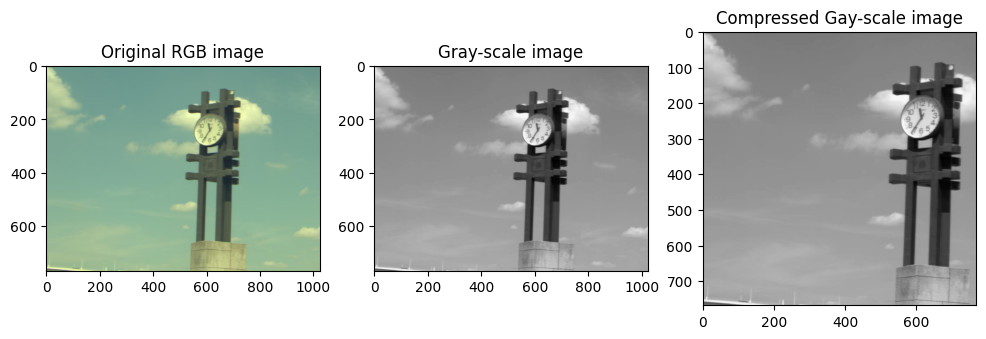

In [15]:
img = mpimg.imread('img-compression-1.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 0)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (768, 412)



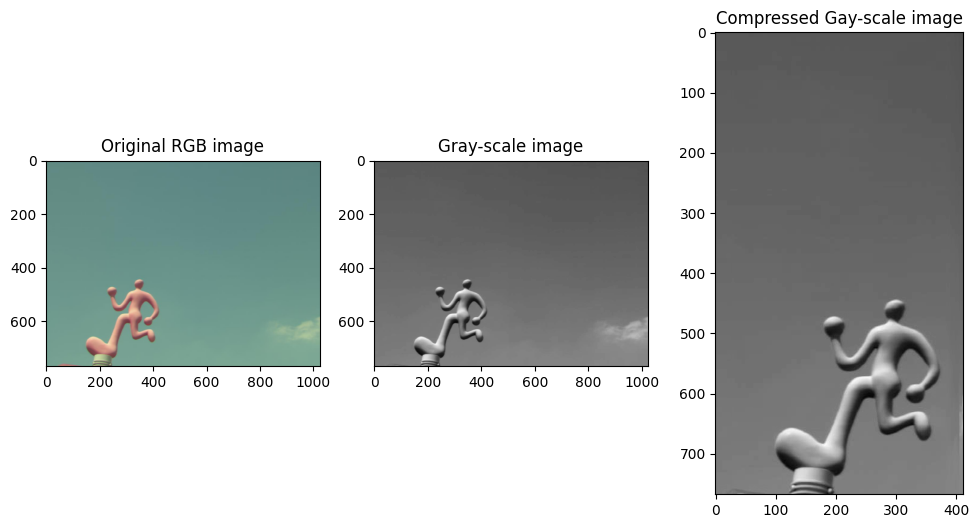

In [16]:
img = mpimg.imread('img-compression-2.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 0)

##### Test of horizontal compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (768, 1024)



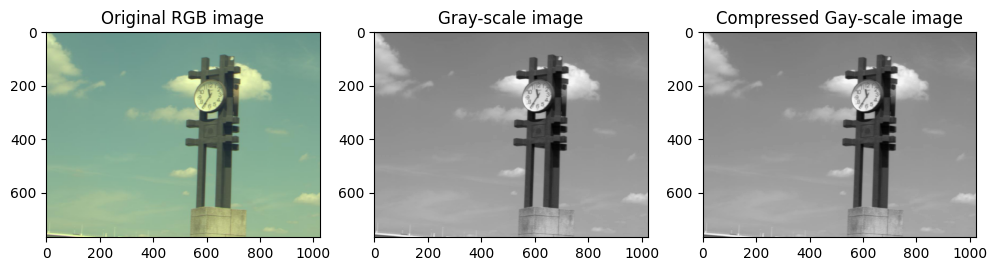

In [17]:
img = mpimg.imread('img-compression-1.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 1)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the original image in Gray scale: (768, 1024)
Shape of the compressed image in Gray scale: (410, 1024)



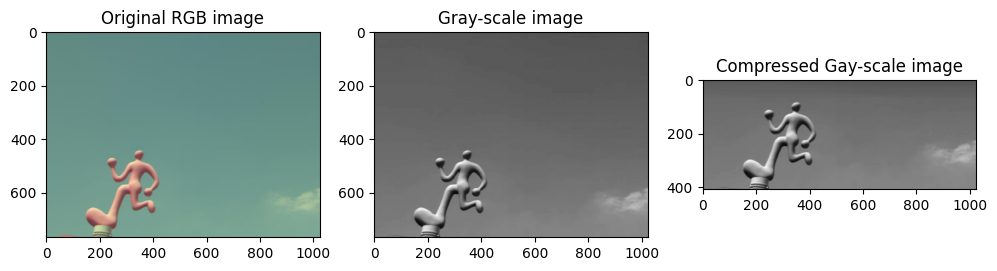

In [18]:
img = mpimg.imread('img-compression-2.jpg')
gray_scale_img_compression_rref_partial_pivot(img, 1)

#### RGB single channel compression (vertically/horizontally) using the Row Reduced Echelon Form with Partial Pivoting
Definition of function to compress the original image into compressed (vertically/horizontally) image in RGB, using the Row Reduced Echelon Form with Partial Pivoting. The function compress the original image identifing the basic columns on each RGB channel, one channel at time. So, th results will be three different images, one for each channel compressed.



* INPUT
  * **img**: Input image in RGB color
  * **compression_mode**: if set to **1**, the function compress the image in horizontal way; default is **0** to compress the image vertically

In [19]:
def rgb_img_compression_rref_partial_pivot(img, compression_mode = 0):

  if compression_mode == 0 or compression_mode == 1:

    plt.figure(figsize=(12,4))
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original RGB image")
    print("Shape of the original image in RBG color: {}".format(img.shape))

    for i in range(0,3):
      # If user select 1, then we will compress the image in horizontal way. To do that,
      # we transpose only the selected channel.
      rgb_channel_image = img[:, :, i].T if compression_mode == 1 else img[:, :, i]

      # For each RGB channel, compute the Row Reduced Echelon Form to identify the basic columns.
      # If we work horizontally, the index of basic columns will be used to select the row to keep
      # in order to compress horizontally
      U, ind_basic_cols, perm_matrix = row_reduced_echelon_form_with_partial_pivot(rgb_channel_image)

      # Reconstruct the image using only the basic columns. If we compress vertically, then we
      # will keep the basic columns. If we are compress horizontally, then the index of the
      # basic columns is used to keep only the relevant rows
      compress_img = img[ind_basic_cols, :] if compression_mode == 1 else img[:,ind_basic_cols]

      plt.subplot(1, 4, i+2)
      plt.imshow(compress_img)
      plt.title("Compression on channel: " + str(i))
      print("Shape of the compressed image on RBG channel {}: {}".format(i, compress_img.shape))
    print("\n")
  else:
    raise ValueError("\nInvalid compression mode selected! Valid compression mode: 0 - to compress vertically; 1 - to compress horizontally.")

##### Test of vertical compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel 0: (768, 768, 3)
Shape of the compressed image on RBG channel 1: (768, 768, 3)
Shape of the compressed image on RBG channel 2: (768, 768, 3)




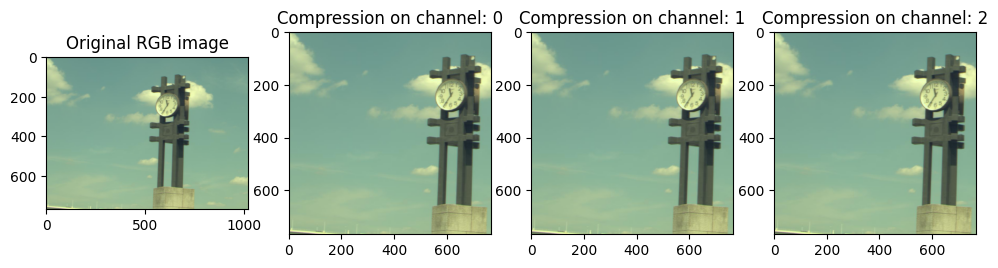

In [20]:
img = mpimg.imread('img-compression-1.jpg')
rgb_img_compression_rref_partial_pivot(img, 0)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel 0: (768, 407, 3)
Shape of the compressed image on RBG channel 1: (768, 403, 3)
Shape of the compressed image on RBG channel 2: (768, 407, 3)




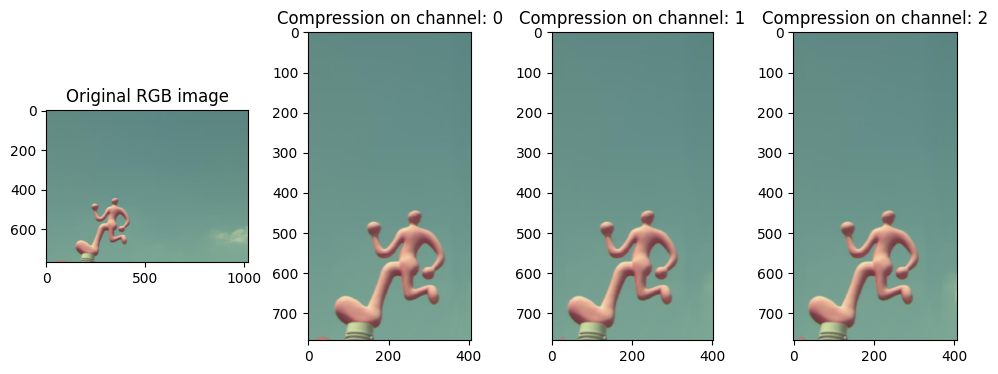

In [21]:
img = mpimg.imread('img-compression-2.jpg')
rgb_img_compression_rref_partial_pivot(img, 0)

##### Test of horizontal compression of an image

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel 0: (768, 1024, 3)
Shape of the compressed image on RBG channel 1: (768, 1024, 3)
Shape of the compressed image on RBG channel 2: (768, 1024, 3)




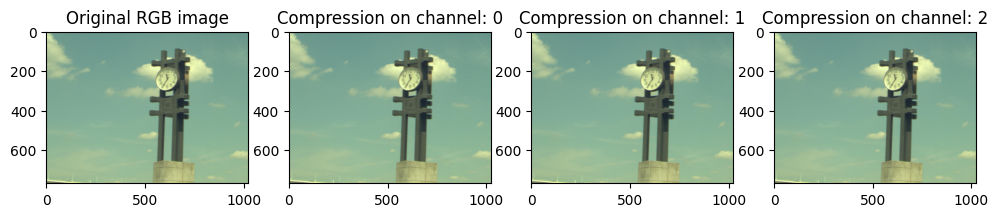

In [22]:
img = mpimg.imread('img-compression-1.jpg')
rgb_img_compression_rref_partial_pivot(img, 1)

Shape of the original image in RBG color: (768, 1024, 3)
Shape of the compressed image on RBG channel 0: (408, 1024, 3)
Shape of the compressed image on RBG channel 1: (408, 1024, 3)
Shape of the compressed image on RBG channel 2: (406, 1024, 3)




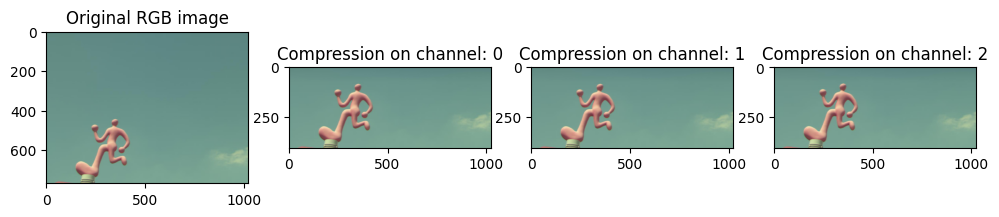

In [23]:
img = mpimg.imread('img-compression-2.jpg')
rgb_img_compression_rref_partial_pivot(img, 1)